# Encontro 05

## Materiais de apoio:

* The Scientist and Engineer's Guide to Digital Signal Processing, de By Steven W. Smith, Ph.D. (capítulo 22)
	* Disponível em http://www.dspguide.com
* Overview of Adaptive Filters and Applications
  * Disponível em https://www.mathworks.com/help/dsp/ug/overview-of-adaptive-filters-and-applications.html

## Tópicos Abordados:

* Eliminação de ruído acústico:
  * Métodos passivos;
  * Métodos ativos:
    * Filtro baseado em modelo do ruído;
    * Filtro adaptativo com captação do ruído.

* Conceitos de Filtros adaptativos:
  * Objetivos e usos;
  * Algoritmos e escolha do filtro;
  * Aplicações comuns:
    * Identificação de sistemas;
    * Identificação da inversa de sistemas;
    * Cancelamento de ruído ou interferência;
    * Predição de sinais.
  * Filtros adaptativos em Python:
    * Pacote Padasip.

* Exemplos de aplicações:
  * Cancelamento do ruído de vuvuzela;
  * Cancelamento do ruído de gravação;
  * Cancelamento do ruído de uma multidão.

## Elaboração:
* Eng. Rodrigo de Marca França.


In [ ]:
# Importação de módulos e instalação de bibliotecas adicionais

# Importação do pacote matématico Math
import math

# Importação do pacote Pandas
import pandas as pd

# Importação dos pacotes NumPy e SciPy
import numpy as np
from scipy.interpolate import interp1d
from scipy import signal

# Importação do pacote librosa e alguns componentes
import librosa
import librosa.display

# Importação do pacote SoundFile
!pip install soundfile
import soundfile as sf

# Importação do pacote Padasip
!pip install padasip
import padasip as pa

# Importação do pacote IPython.display
import IPython.display as ipd

# Importação de Widgets
import ipywidgets as widgets

# Importação do pacote PyPlot do MatPlotLib
import matplotlib.pyplot as plt

# Instalação e importação do pacote mpld3
!pip install mpld3
import mpld3

# importação do módulo timeit
import timeit


  Created wheel for padasip: filename=padasip-1.1.1-cp37-none-any.whl size=52974 sha256=0a5f153c00e080cb47d5004558aea99230859568b97ba374e757cd8e824da9c6
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip
     |████████████████████████████████| 890kB 16.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=2ca9d45b155a5d074daeda49b917dfd11eab1d489f653240350dbc96ee4816a7
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# Importação de dados do Google Drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

filepath_input = 'My Drive/Colab Notebooks/Processamento_Digital_de_Sinais_Aplicacoes_Praticas/Encontro_05/Recursos/'
filepath_output = 'My Drive/Colab Notebooks/Processamento_Digital_de_Sinais_Aplicacoes_Praticas/Encontro_05/Gerados/'

Mounted at /gdrive
/gdrive


## Eliminação de ruído acústico:

Um problema comum na área acústica é a eliminação de sons indesejáveis de um ambiente ou gravação. Esses sons indesejáveis podem ser considerados ruídos acústicos e usualmente são causados por fontes externas ou não-controláveis.

### Métodos passivos

A maneira mais simples de eliminação de ruído acústico é através do bloqueio físico das ondas sonoras. Usando materiais e estruturas com grande capacidade de absorção ou difusão de ondas sonoras se propagando no ar, é possível reduzir completamente (ou até eliminar) um ruído acústico.

Esse método é passivo (não exige energia) e funciona apenas com sons propagando no ar (não é possível impedir a propagação de um som digital). Muitas vezes necessita de materiais especiais e projetos especializados para ser realmente eficaz.


### Métodos ativos

Para áudio digital é necessário a utilização de métodos ativos para a redução de ruídos acústicos. Destacam-se os filtros baseados em modelo do ruído e os filtros adaptativos com captação do ruído para essa tarefa.



#### Filtro baseado em modelo do ruído
O filtro baseado em modelo do ruído pode ser usado quando se tem um modelo coerente do ruído esperado. Isso é, sabe-se de antemão como o ruído se comporta (exigindo conhecimento e modelamento prévio)

Nesse caso, sabemos qual a característica acústica esperada do ruído, como a composição harmônica e as magnitudes dele. Usando essas informações podemos projetar um filtro FIR/IIR para filtras o ruído esperado do sinal de áudio.

Esses filtros têm a vantagem de serem simples de serem executados (mas não de serem projetados) e necessitarem de baixo poder computacional. No entanto, não possuem flexibilidade e são pouco eficazes em ruídos não-esperados ou mal modelados.

#### Filtro adaptativo com captação do ruído
Já os filtros adaptativos com captação do ruído podem ser usados em qualquer situação em que seja possível captar de alguma maneira o ruído acústico, mesmo sem nenhum conhecimento de como o ruído pode ser.

Usando um filtro que adapta automaticamente a sua resposta a condições externas, é possível usar o ruído captado para minimizar a presença dele no sinal de áudio. Por exemplo: na gravação do áudio de um discurso, queremos eliminar o som da plateia. Podemos usar um segundo microfone gravando apenas o som da plateia como referência para minimizar a presença da plateia no som do discurso.

A maior vantagens desses filtros é que não há necessidade de conhecer o ruído de antemão ou projetar um filtro especial para a aplicação. No entanto filtros adaptativos exigem consideravelmente mais poder de processamento para serem executados do que filtros FIR/IIR.

## Conceitos de Filtros adaptativos

### Objetivos e usos

Filtros adaptativos são uma classe especial de filtros digitais que adaptam sua resposta em tempo real de acordo com alguma resposta desejada. Eles fazem isso alterando os seus coeficientes para que o filtro convirja para um estado ótimo.

O critério de otimização é uma função custo qualquer. É comumente usado o erro quadrático médio entre a saída do filtro adaptativo e o sinal desejado. Conforme o filtro adapta seus coeficientes, o erro quadrado médio (Mean Square Error – MSE) converge para um valor mínimo. Nesse estado, o filtro está adaptado e os coeficientes convergiram para uma solução.

Pode-se dizer que a saída do filtro $y(k)$ se aproxima fortemente com o sinal desejado $d(k)$. Quando as características do sinal de entrada (também chamado de ambiente do filtro) mudam, o filtro gera novos coeficientes para se adaptar ao novo ambiente.

Na figura abaixo é mostrada a estrutura geral do algoritmo de um filtro adaptativo.

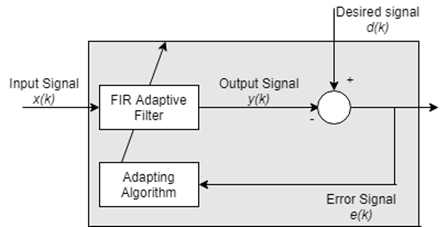

### Algoritmos e escolha do filtro

No estado estacionário, quando o filtro se adaptou, o erro entre a saída do filtro e o sinal desejado é mínimo, não zero. Esse erro é conhecido como erro estacionário (ou erro do estado estacionário).

A velocidade com que o filtro converge para o estado ótimo, conhecido como velocidade de convergência, depende de múltiplos fatores como da natureza do sinal de entrada, a escolha do algoritmo de filtro adaptativo e o tamanho da passada do algoritmo.

A escolha do algoritmo de filtro geralmente depende de fatores como a performance de convergência necessária para a aplicação, complexidade computacional do algoritmo, estabilidade do ambiente do filtro e quaisquer outras restrições.

O algoritmo mais comum e simples de ser implementado é o LMS (Least Mean Square – Minimo Quadrado Médio). No entanto, ele tem problemas com instabilidade, em especial devido a sua sensibilidade em relação a escala do sinal de entrada. O NLMS (Normalized Least Mean Square – Minimo Quadrado Médio Normalizado) resolve parte desses problemas, tendo maior estabilidade e velocidade de convergência ao custo de complexidade computacional.

Outro exemplo são os algoritmos RLS (Recursive Least Squares - Minimo Quadrados Recursivos) que são altamente estáveis e eficientes em ambientes variantes no tempo, mas computacionalmente mais complexos que os algoritmos LMS.

A escolha do algoritmo depende do ambiente de filtragem e das características especificas de cada aplicação.

### Aplicações comuns

Algumas das aplicações mais comuns para filtros adaptativos são:

#### Identificação de sistemas

Uma aplicação comum é a utilização de filtros adaptativos para identificar sistemas desconhecidos, como a resposta de um canal de comunicação ou a resposta em frequência de um auditório (para citar duas aplicações bem distintas). Outras aplicações incluem cancelamento de ecos e identificação de canais.

Na figura abaixo temos uma entra diversas possíveis estruturas para esse fim. Colocando o sistema em paralelo com o filtro adaptativo, o filtro vai convergir para a resposta o mais próxima possível do sistema escolhido, quando $e(k)$ for bem pequeno.

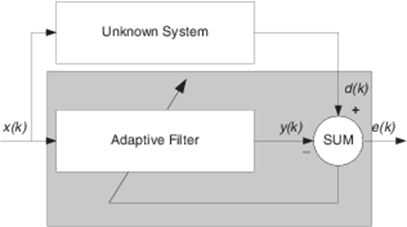

#### Identificação da inversa de sistemas

Colocando o sistema desconhecido em serie com o filtro adaptativo permite que o filtro convirja para o sistema inverso do sistema desconhecido quando $e(k)$ de torna bem pequeno. Como mostrado na figura abaixo, é necessário adicionar um atraso no caminho do sinal desejado $d(k)$ para manter a somatória sincronizada. Adicionar esse atraso mantem o sistema causal.

Um exemplo de utilização é a transmissão de dados e voz por linhas telefônicas. Ao transmitir esses sinais por fios de cobres, os fios agem como filtros, tendo respostas em frequências que decaem em altas frequências (ou taxas de dados), entre outras anomalias.

Adicionando um filtro adaptativo com a resposta inversa da resposta dos fios de cobre, e configurando-o para se adaptar em tempo real, permite que o filtro compense o decaimento e anomalias da transmissão. Assim, aumentando a banda de frequências disponível e a taxas de dados de sistemas telefônicos.

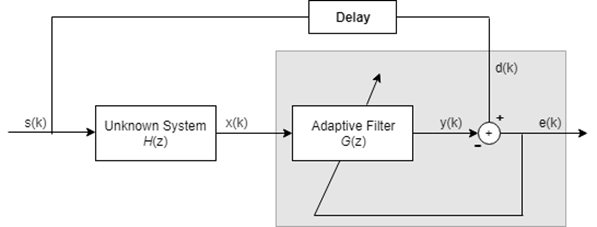

#### Cancelamento de ruído ou interferência

Também é possível usar filtros adaptativos para remover ruídos de sinais em tempo real. Nesse caso, o sinal desejado (que deve ser limpo) combina ruído e informação desejada. Para remover o ruído, podemos fornecer como entrada do filtro um sinal $n’(k)$ que seja correlacionado ao ruído que queremos remover do sinal desejado. Essa estrutura pode ser vista na imagem abaixo.

Desde que o a entrada do filtro se mantenha correlacionado ao ruído indesejado que acompanha o sinal desejado, o filtro adaptativo ajusta seus coeficientes para reduzir o valor da diferença entre $y(k)$ e $d(k)$. Isso faz com que a saída do filtro $y(k)$ convirja para o próprio ruído, resultando no sinal limpo em $e(k)$. Note que nessa aplicação, o sinal do erro converge para o sinal de entrada limpo, em vez de para zero.

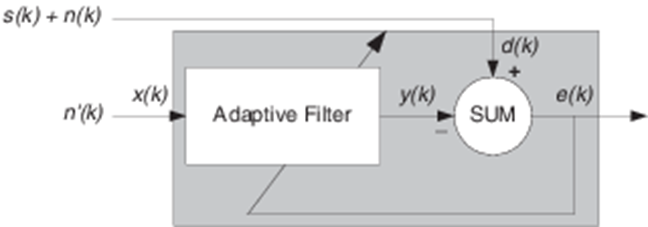

#### Predição de sinais

Prever sinais sempre necessita da escolha de algumas suposições chaves. Assume-se que o sinal é estacionário ou vária lentamente no tempo e que é periódico no tempo também.

Aceitando essas suposições, o filtro adaptativo precisa prever os valores futuros do sinal desejado baseado nos valores passados. Quando $s(k)$ é periódico e o filtro é longo o bastante para lembrar dos valores passados, a estrutura com o atraso na entrada, apresentado na figura abaixo, consegue realizar a predição. É possível usar essa estrutura para remover um sinal periódico de sinais de ruídos estocásticos, por exemplo.

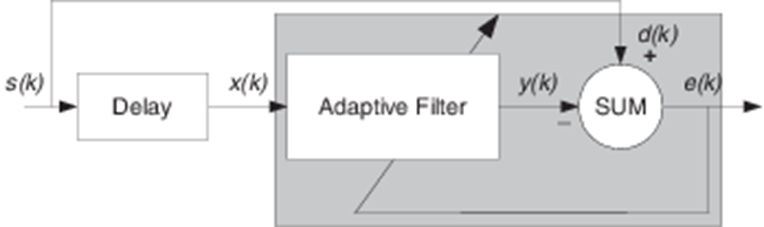

### Filtros adaptativos em Python

#### Pacote Padasip

O pacote Padasip foi criado para simplificar tarefas de processamento adaptativo de sinais no Python (filtragem, predição, reconstrução, classificação, etc.). Sua documentação está disponível em http://matousc89.github.io/padasip/.

Dentre outros recursos, destaca-se a implementação de múltiplos filtros adaptativos:
* Filtro adaptativo LMS (least-mean-squares);
* Filtro adaptativo NLMS (normalized least-mean-squares);
* Filtro adaptativo LMF (least-mean-fourth);
* Filtro adaptativo NLMF (normalized least-mean-fourth);
* Filtro adaptativo SSLMS (sign-sign least-mean-squares);
* Filtro adaptativo NSSLMS (normalized sign-sign least-mean-squares);
* Filtro adaptativo RLS (recursive-least-squares);
* Filtro adaptativo GNGD (generalized normalized gradient descent);
* Filtro adaptativo AP (affine projection).

## Exemplos de aplicações:

In [ ]:
# Realiza o carregamento do arquivo de áudio base
olha_gol_sound, olha_gol_sampling_rate = librosa.load(filepath_input + 'olha_o_gol.mp3', mono=True, sr=None)

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio base carregado
ipd.Audio(olha_gol_sound, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

### Cancelamento do ruído de vuvuzela

In [ ]:
# Realiza o carregamento do arquivo de áudio de ruído
vuvuzela_sound, vuvuzela_sampling_rate = librosa.load(filepath_input + 'vuvuzela_sound_file.wav', mono=True, sr=None)

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(vuvuzela_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=vuvuzela_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(vuvuzela_sound, rate=vuvuzela_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Geração do áudio base com ruído
olha_gol_vuvuzela_sound = olha_gol_sound + 0.707*vuvuzela_sound

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_vuvuzela_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_vuvuzela_sound, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Criação sinal_erro_e aplicação do filtro adaptativo no arquivo de aúdio

# Caracteristicas do filtro adaptativo
filter_length = 10
filter_learning_rate = 0.1

# Criação dos sinais de entrada do filtro
sinal_entrada_u = olha_gol_sound
sinal_ruido_v = vuvuzela_sound
sinal_desejado_d = olha_gol_vuvuzela_sound

# Filtragem adaptativa do áudio
matriz_entrada_x = pa.input_from_history(sinal_ruido_v, filter_length)[:-1]
sinal_desejado_d = sinal_desejado_d[filter_length:]
sinal_entrada_u = sinal_entrada_u[filter_length:]
#filtro_adaptativo = pa.filters.FilterLMS(n=filter_length, mu=filter_learning_rate)
filtro_adaptativo = pa.filters.FilterNLMS(n=filter_length, mu=filter_learning_rate)
sinal_saida_y, sinal_erro_e, historico_pesos_w = filtro_adaptativo.run(sinal_desejado_d, matriz_entrada_x)

# Estimação do erro do sinal filtrado
erro_quadratico_medio_e = np.dot(sinal_entrada_u - sinal_erro_e, sinal_entrada_u - sinal_erro_e) / float(len(sinal_entrada_u))

# Atribuição do sinal filtrado
olha_gol_vuvuzela_sound_filtered = sinal_erro_e

# Print dos resultados
print("Erro quadratico médio do sinal filtrado =", erro_quadratico_medio_e)
print("")

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_vuvuzela_sound_filtered)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_vuvuzela_sound_filtered, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Exportação do aúdio filtrado

# Escreve o arquivo de áudio como 24bit PCM WAV
sf.write(filepath_output + 'olha_gol_vuvuzela_sound_filtered.wav', olha_gol_vuvuzela_sound_filtered, olha_gol_sampling_rate, subtype='PCM_24')

### Cancelamento do ruído de gravação

In [ ]:
# Realiza o carregamento do arquivo de áudio de ruído
record_sound, record_sampling_rate = librosa.load(filepath_input + 'record_sound_file.wav', mono=True, sr=None)

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(record_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=record_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(record_sound, rate=record_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Geração do áudio base com ruído
olha_gol_record_sound = olha_gol_sound + 0.707*record_sound

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_record_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_record_sound, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Criação sinal_erro_e aplicação do filtro adaptativo no arquivo de aúdio

# Caracteristicas do filtro adaptativo
filter_length = 10
filter_learning_rate = 0.1

# Criação dos sinais de entrada do filtro
sinal_entrada_u = olha_gol_sound
sinal_ruido_v = record_sound
sinal_desejado_d = olha_gol_record_sound

# Filtragem adaptativa do áudio
matriz_entrada_x = pa.input_from_history(sinal_ruido_v, filter_length)[:-1]
sinal_desejado_d = sinal_desejado_d[filter_length:]
sinal_entrada_u = sinal_entrada_u[filter_length:]
#filtro_adaptativo = pa.filters.FilterLMS(n=filter_length, mu=filter_learning_rate)
filtro_adaptativo = pa.filters.FilterNLMS(n=filter_length, mu=filter_learning_rate)
sinal_saida_y, sinal_erro_e, historico_pesos_w = filtro_adaptativo.run(sinal_desejado_d, matriz_entrada_x)

# Estimação do erro do sinal filtrado
erro_quadratico_medio_e = np.dot(sinal_entrada_u - sinal_erro_e, sinal_entrada_u - sinal_erro_e) / float(len(sinal_entrada_u))

# Atribuição do sinal filtrado
olha_gol_record_sound_filtered = sinal_erro_e

# Print dos resultados
print("Erro quadratico médio do sinal filtrado =", erro_quadratico_medio_e)
print("")

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_record_sound_filtered)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_record_sound_filtered, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Exportação do aúdio filtrado

# Escreve o arquivo de áudio como 24bit PCM WAV
sf.write(filepath_output + 'olha_gol_record_sound_filtered.wav', olha_gol_record_sound_filtered, olha_gol_sampling_rate, subtype='PCM_24')

### Cancelamento do ruído de uma multidão

In [ ]:
# Realiza o carregamento do arquivo de áudio de ruído
crowd_sound, crowd_sampling_rate = librosa.load(filepath_input + 'crowd_sound_file.wav', mono=True, sr=None)

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(crowd_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=crowd_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(crowd_sound, rate=crowd_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Geração do áudio base com ruído
olha_gol_crowd_sound = olha_gol_sound + 0.707*crowd_sound

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_crowd_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_crowd_sound, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Criação sinal_erro_e aplicação do filtro adaptativo no arquivo de aúdio

# Caracteristicas do filtro adaptativo
filter_length = 10
filter_learning_rate = 0.1

# Criação dos sinais de entrada do filtro
sinal_entrada_u = olha_gol_sound
sinal_ruido_v = crowd_sound
sinal_desejado_d = olha_gol_crowd_sound

# Filtragem adaptativa do áudio
matriz_entrada_x = pa.input_from_history(sinal_ruido_v, filter_length)[:-1]
sinal_desejado_d = sinal_desejado_d[filter_length:]
sinal_entrada_u = sinal_entrada_u[filter_length:]
#filtro_adaptativo = pa.filters.FilterLMS(n=filter_length, mu=filter_learning_rate)
filtro_adaptativo = pa.filters.FilterNLMS(n=filter_length, mu=filter_learning_rate)
sinal_saida_y, sinal_erro_e, historico_pesos_w = filtro_adaptativo.run(sinal_desejado_d, matriz_entrada_x)

# Estimação do erro do sinal filtrado
erro_quadratico_medio_e = np.dot(sinal_entrada_u - sinal_erro_e, sinal_entrada_u - sinal_erro_e) / float(len(sinal_entrada_u))

# Atribuição do sinal filtrado
olha_gol_crowd_sound_filtered = sinal_erro_e

# Print dos resultados
print("Erro quadratico médio do sinal filtrado =", erro_quadratico_medio_e)
print("")

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(olha_gol_crowd_sound_filtered)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala logarítmica no segundo subplot
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=olha_gol_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio de ruído carregado
ipd.Audio(olha_gol_crowd_sound_filtered, rate=olha_gol_sampling_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Exportação do aúdio filtrado

# Escreve o arquivo de áudio como 24bit PCM WAV
sf.write(filepath_output + 'olha_gol_crowd_sound_filtered.wav', olha_gol_crowd_sound_filtered, olha_gol_sampling_rate, subtype='PCM_24')